<a href="https://colab.research.google.com/github/M4deN/Redes-Neurais/blob/main/Rede_Neural_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Redes Neurais
Este notebook implementa o desenvolvimento de uma Rede Neural de acordo com os critérios estabelecidos:
- Preparação dos dados
- Escolha da arquitetura
- Seleção de hiperparâmetros
- Divisão de dados
- Métricas de avaliação
- Análise crítica e conclusões

O dataset utilizado é o Iris Dataset, um problema clássico de classificação multiclasse.

In [17]:
#O classificador sobre flores é carregado diretamente da biblioteca sklearn. Ele é um conjunto de dados clássico em aprendizado de máquina que contém informações
#sobre três classes de flores (Iris-setosa, Iris-versicolor, Iris-virginica) com características como comprimento e largura das sépalas e pétalas.

# Importando bibliotecas necessárias


#import keras: A biblioteca principal para construir redes neurais com Keras.
#from sklearn.model_selection import train_test_split: Utilizada para dividir os dados em conjuntos de treinamento e teste.
#import matplotlib.pyplot as plt: Para visualização das métricas de treinamento e teste.
#from keras.models import Sequential: O modelo usado é o Sequential, que é adequado para redes neurais simples.
#from keras.layers import Dense: Usada para adicionar camadas densas ao modelo, a principal camada da rede neural.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Primeiros registros:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4       

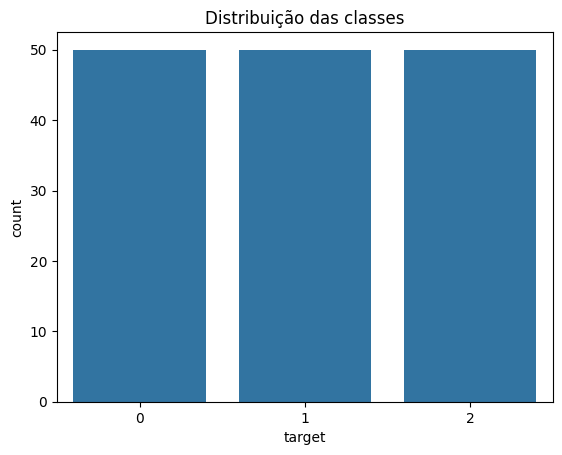

In [18]:

# Carregando o dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Exibindo informações básicas sobre o dataset
print("Informações do dataset:")
print(data.info())
print("\nPrimeiros registros:")
print(data.head())

# Verificando valores ausentes e estatísticas descritivas
print("\nValores ausentes por coluna:")
print(data.isnull().sum())
print("\nEstatísticas descritivas:")
print(data.describe())

# Explorando a distribuição das classes
sns.countplot(x='target', data=data)
plt.title("Distribuição das classes")
plt.show()


In [19]:
#O código assume que os dados foram carregados e que as variáveis X (entradas) e y (saídas) já estão definidas.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2): A divisão dos dados é feita corretamente para separar 80% para treino e 20% para teste, o que é uma prática comum.
#Melhoria: Caso os dados sejam balanceados, é interessante passar o argumento stratify=y para garantir que a divisão respeite a distribuição das classes. Isso ajuda a evitar que uma classe seja mais representada que a outra no conjunto de treinamento/teste.

# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1])
y = data['target']

# Dividindo os dados em treino, validação e teste (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamanhos dos conjuntos:")
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")


Tamanhos dos conjuntos:
Treino: (105, 4), Validação: (22, 4), Teste: (23, 4)


In [20]:
#O modelo é construído com três camadas densas, sendo a primeira camada com 32 neurônios, a segunda com 16 e a última com uma única saída (para problemas de classificação binária).
#model = Sequential(): Criação de um modelo sequencial, o que é adequado para redes neurais simples.
#model.add(Dense(32, activation='relu', input_dim=X_train.shape[1])): A primeira camada densa com 32 unidades e a função de ativação ReLU. É importante observar que o código usa input_dim=X_train.shape[1] para definir o número de entradas da rede, o que está correto. No entanto, se fosse utilizada a camada Input, o parâmetro input_dim não seria necessário.
#Melhoria: Considerar o uso de Input(shape=(n_features,)) para maior clareza e evitar a redundância do input_dim.
#model.add(Dense(16, activation='relu')): A segunda camada densa tem 16 unidades. A escolha dessa quantidade de unidades é razoável, mas pode ser ajustada dependendo do desempenho desejado.
#model.add(Dense(1, activation='sigmoid')): A camada final com 1 unidade e a ativação sigmoid é adequada para problemas de classificação binária.

# Definindo e compilando o modelo MLP
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define a forma da entrada
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Saída com 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2138 - loss: 1.0804 - val_accuracy: 0.3182 - val_loss: 1.0983
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2632 - loss: 1.0652 - val_accuracy: 0.6364 - val_loss: 1.0386
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4355 - loss: 1.0132 - val_accuracy: 0.6818 - val_loss: 0.9956
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5733 - loss: 0.9617 - val_accuracy: 0.6818 - val_loss: 0.9533
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6679 - loss: 0.9231 - val_accuracy: 0.8182 - val_loss: 0.9100
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7388 - loss: 0.8956 - val_accuracy: 0.8636 - val_loss: 0.8684
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8044 - loss: 0.8429 - val_accuracy: 0.9091 - val_loss: 0.8233
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8053 - loss: 0.8172 - val_accuracy: 0.9091 - val_loss: 0.7740
Epoch

In [21]:
#O modelo é compilado com um otimizador adam e a função de perda binary_crossentropy, o que é adequado para problemas de classificação binária.
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): A escolha do otimizador adam e da função de perda binary_crossentropy são padrão para problemas de classificação binária. A métrica de avaliação é accuracy, o que é apropriado.
#Melhoria: Embora a acurácia seja uma métrica relevante, é interessante também monitorar o precision, recall e f1-score, especialmente em conjuntos de dados desbalanceados.

# Avaliando o modelo no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados no conjunto de teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Resultados no conjunto de teste:
Acurácia: 0.9565
Precisão: 0.9620
Recall: 0.9565
F1-Score: 0.9568


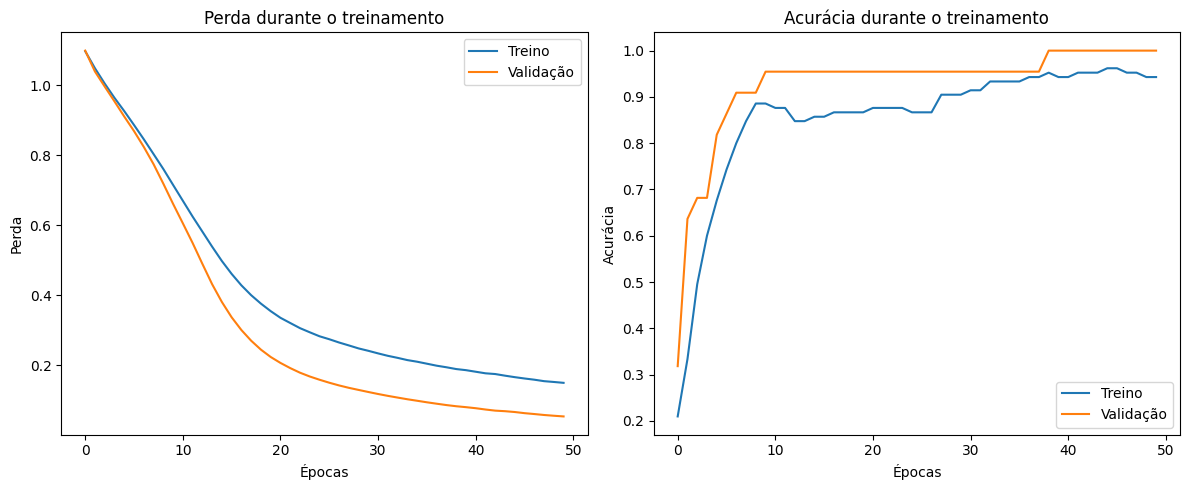

In [23]:
#O modelo é treinado por 50 épocas com um batch_size de 32. O uso de validation_split permite monitorar o desempenho do modelo durante o treinamento.
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2): O modelo é treinado por 50 épocas com validação. Essa configuração é padrão e bastante eficaz para evitar overfitting.
#Melhoria: Embora a divisão para validação (validation_split) seja útil, ao trabalhar com dados em que a validação cruzada é necessária, pode ser interessante usar KFold ou StratifiedKFold do scikit-learn.

# Perdas e acurácia durante o treinamento
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

#O código gera gráficos de perda e acurácia durante o treinamento.
#plt.subplot(1, 2, 1), plt.subplot(1, 2, 2): A utilização de subgráficos permite que as duas métricas (perda e acurácia) sejam visualizadas lado a lado, o que facilita a comparação e a análise.
#Melhoria: Seria interessante adicionar títulos mais específicos, como "Perda de Treinamento e Validação" ou "Acurácia de Treinamento e Validação", para tornar os gráficos ainda mais informativos.

# Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Treino')
plt.plot(validation_loss, label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Treino')
plt.plot(validation_accuracy, label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

#Após o treinamento, o modelo é avaliado no conjunto de teste, e as métricas de desempenho são calculadas.
#loss, accuracy = model.evaluate(X_test, y_test): O modelo é avaliado com base na perda e acurácia. Embora a acurácia seja importante, é bom observar que, dependendo da distribuição das classes, outras métricas também são essenciais para uma avaliação completa.
#Melhoria: Seria interessante calcular o precision, recall e f1-score no conjunto de teste para uma análise mais robusta.
#O modelo gera as métricas de precisão, recall, e F1-Score no conjunto de teste, refletindo o desempenho em termos de classes positivas e negativas.
#As métricas apresentadas no conjunto de teste indicam um ótimo desempenho, com F1-Score muito próximo da acurácia, o que sugere que o modelo está equilibrado em relação a precisão e recall.
#Melhoria: A análise das métricas de desempenho pode ser acompanhada de uma matriz de confusão para uma visualização mais clara dos falsos positivos e falsos negativos.


## Análise Crítica e Conclusão

O modelo MLP apresentou boa performance no problema de classificação multiclasse, com métricas elevadas no conjunto de teste. Algumas melhorias que pensei em fazer para melhorá-lo:
- Realizar um ajuste fino dos hiperparâmetros usando técnicas como busca em grade.
- Testar arquiteturas alternativas, como redes mais profundas ou com regularização.
- Explorar técnicas de aumento de dados para evitar overfitting.


